In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

In [145]:
df = pd.read_csv("/Users/paulecoffet/Documents/isir/These/roborobo3/roborobo3/logs/scorelogtestsupposenotwork/rep00/replay/logscore_0.txt.gz")

In [146]:
gp = df.groupby(['eval', 'iter', 'id'])
meancoop = gp.mean()['othercoop'].copy()
chosen = gp.apply(lambda x: x.loc[x['score'].idxmax()]['othercoop']).copy()

In [147]:
pd.DataFrame({'mean': meancoop, 'chosencoop': chosen}).iloc[200:300]

mean  chosencoop
eval iter id                      
0    3    55  0.238232    0.171731
          56  0.226312    0.587913
          57  0.220587    0.000000
          59  0.226404    0.171731
          60  0.233046    0.171731
...                ...         ...
     4    73  0.231194    0.387892
          74  0.234949    0.228975
          75  0.242356    0.164995
          76  0.235538    0.212139
          77  0.232887    0.117856

[100 rows x 2 columns]

In [148]:
chosen = gp.apply(lambda x: x.loc[x['score'].idxmax()]['othercoop']).copy()

In [149]:
df.query('eval == 0 and iter == 1 and id == 1').mean()

eval         0.000000
iter         1.000000
id           1.000000
cost         1.000000
nbpart       2.150000
owncoop      0.979841
othercoop    0.188566
score       -0.999887
dtype: float64

In [150]:
meancoop[0],chosen[0]

(iter  id
 1     0     0.176191
       1     0.188566
       2     0.223828
       3     0.205063
       5     0.188902
               ...   
 999   95    0.239141
       96    0.245471
       97    0.245387
       98    0.222995
       99    0.243493
 Name: othercoop, Length: 79919, dtype: float64, iter  id
 1     0     0.212151
       1     0.404070
       2     0.446994
       3     0.737413
       5     0.454582
               ...   
 999   95    0.209601
       96    0.209601
       97    0.209601
       98    0.000000
       99    0.255913
 Length: 79919, dtype: float64)

In [154]:
np.sum(chosen >= meancoop) / len(chosen)

0.5306844757938444

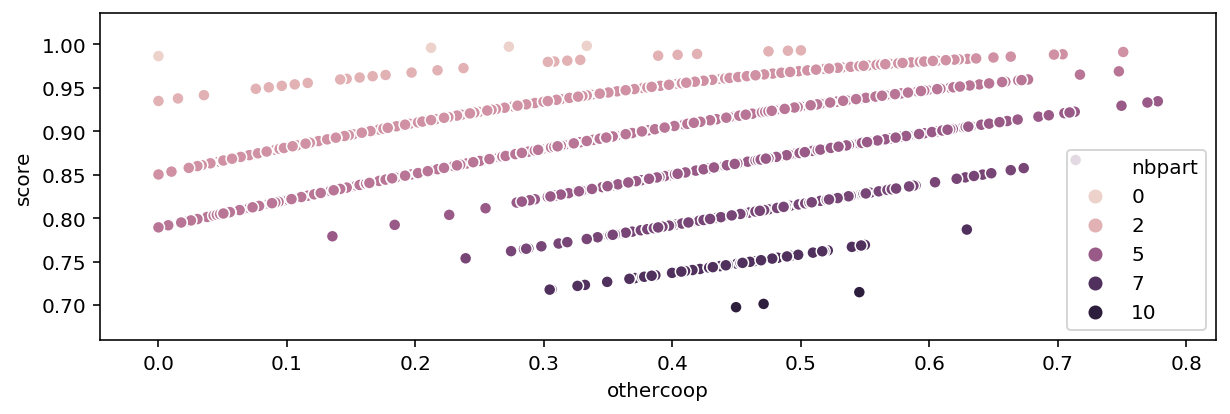

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df.query('eval == 0 and id == 10'), x='othercoop', y='score', hue="nbpart")

In [140]:
df

,eval,iter,id,cost,nbpart,owncoop,othercoop,score
0,0,1,45,1,1,0.000000,0.555592,0.255653
1,0,1,35,1,1,0.636419,0.555592,1.000000
2,0,1,35,1,1,0.636419,0.000000,0.999779
3,0,1,33,1,1,0.000000,0.555592,1.000000
4,0,1,33,1,1,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
3197772,1,999,82,1,4,0.090940,0.959625,0.937850
3197773,1,999,82,1,3,0.090941,0.313192,0.972840
3197774,1,999,82,1,4,0.090940,0.949567,0.937470
3197775,1,999,82,1,4,0.090940,0.798011,0.931612
